dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/breast_cancer_wisconsin.csv'

Mounted at /content/drive


In [ ]:
#importing packages
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [ ]:
print("Data Type of radius_mean Column:", data['radius_mean'].dtype)

Data Type of radius_mean Column: float64


In [ ]:
import pandas as pd
data = pd.read_csv(file_path)
mapping = {'M': 0, 'B': 1}
data['diagnosis'] = data['diagnosis'].map(mapping)
#data.drop(columns=['radius_mean'], inplace=True)
data.drop(columns=data.columns[-1], inplace=True)

In [ ]:
# Save the DataFrame to a new CSV file
data.to_csv('updated_data.csv', index=False)

In [ ]:
#loading dataset
def load_dataset(fname):
    data=read_csv(fname,header=None)
    dataset=data.values
    X=dataset[:,2:]
    y=dataset[:,1]
    return X,y

In [ ]:
#Train Test split
X,y=load_dataset("updated_data.csv")
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=1)
print('Train',X_train.shape,y_train.shape)
print('Test',X_test.shape,y_test.shape)

Train (381, 30) (381,)
Test (189, 30) (189,)


In [ ]:
#ANOVA F_statistic score based feature selection
def select_features(X_train,y_train,X_test):
    fs=SelectKBest(score_func=f_classif,k=4)
    fs.fit(X_train,y_train)
    X_train_fs=fs.transform(X_train)
    X_test_fs=fs.transform(X_test)
    return X_train_fs,X_test_fs,fs

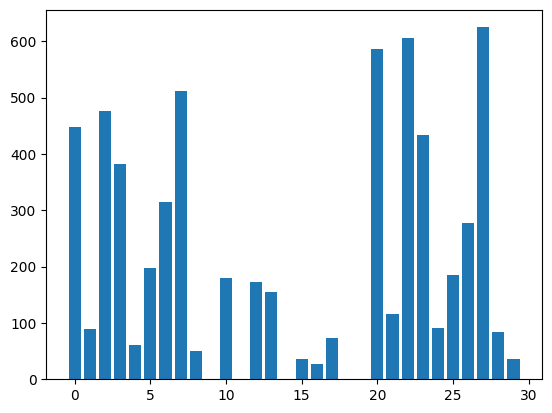

In [ ]:
#Selecting best features and plotting
X_train_fs,X_test_fs,fs=select_features(X_train,y_train,X_test)
pyplot.bar([i for i in range(len(fs.scores_))],fs.scores_)
pyplot.show()

In [ ]:
#feature scores
fs.scores_

array([4.47925901e+02, 8.89283166e+01, 4.75452576e+02, 3.82897338e+02,
       6.08376062e+01, 1.97595772e+02, 3.15177525e+02, 5.12120150e+02,
       5.03605155e+01, 3.68405973e-01, 1.80557332e+02, 1.29496566e+00,
       1.73279908e+02, 1.54328338e+02, 1.36392511e+00, 3.54090648e+01,
       2.73092727e+01, 7.34925788e+01, 1.21013989e-01, 1.09635954e+00,
       5.85638292e+02, 1.16133522e+02, 6.05280046e+02, 4.34086109e+02,
       9.02296798e+01, 1.85817089e+02, 2.76529363e+02, 6.24801808e+02,
       8.33056151e+01, 3.66708153e+01])

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
#Mutual information based feature selection
def select_features_2(X_train,y_train,X_test):
    fs=SelectKBest(score_func=mutual_info_classif,k=4)
    fs.fit(X_train,y_train)
    X_train_fs=fs.transform(X_train)
    X_test_fs=fs.transform(X_test)
    return X_train_fs,X_test_fs,fs

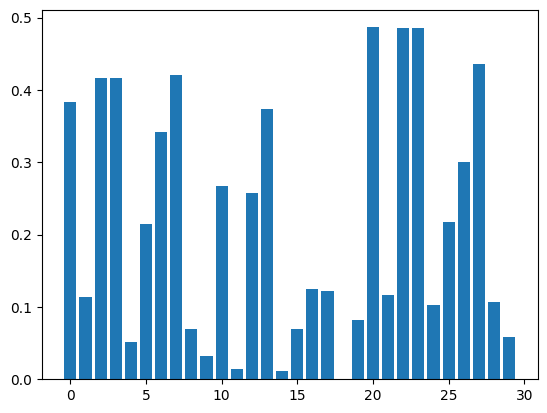

In [ ]:
#Selecting best features using MI and plotting
X_train_fs2,X_test_fs2,fs2=select_features_2(X_train,y_train,X_test)
pyplot.bar([i for i in range(len(fs2.scores_))],fs2.scores_)
pyplot.show()

In [ ]:
#feature scores
fs2.scores_

array([0.38333629, 0.11306886, 0.41671113, 0.41612434, 0.05222056,
       0.21466185, 0.34242176, 0.42130265, 0.06881884, 0.0316409 ,
       0.2672922 , 0.01427818, 0.25692638, 0.37383815, 0.01077372,
       0.06938387, 0.12493933, 0.12264982, 0.        , 0.08236477,
       0.48659653, 0.1167721 , 0.48564269, 0.48566612, 0.1031564 ,
       0.21783204, 0.30017856, 0.43630855, 0.10697451, 0.05787873])

In [ ]:
#Building model with all features
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np
print(X_test.dtype)  # Make sure it's of data type float or int
print(X_test.shape)
X_test = np.array(data[1:], dtype=float)
#X_test=X_test.astype(float)
print(X_test.dtype)

float64
(568, 32)
float64


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

print("Shapes before modification:")
print(X_train.shape)
print(X_test.shape)


X_test = X_test[:, :30]


X_test = X_test[:y_test.shape[0]]

print("Shapes of X_test and y_test:")
print(X_test.shape)
print(y_test.shape)

model1 = LogisticRegression(solver='liblinear')
model1.fit(X_train, y_train)

yhat = model1.predict(X_test)

accuracy = accuracy_score(y_test, yhat)
print("Accuracy: %.2f" % (accuracy * 100))


Shapes before modification:
(381, 30)
(568, 30)
Shapes of X_test and y_test:
(189, 30)
(189,)
Accuracy: 64.02


In [ ]:
model1=LogisticRegression(solver='liblinear')
model1.fit(X_train,y_train)
yhat=model1.predict(X_test)
accuracy=accuracy_score(y_test,yhat)
print("Accuracy: %.2f" %(accuracy*100))

Accuracy: 64.02


In [ ]:
X_test_fs = np.array(data[1:], dtype=float)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X_test_fs = X_test_fs[:, :4]


X_test_fs = X_test_fs[:y_test.shape[0]]


print("Shapes of X_test and y_test:")
print(X_test_fs.shape)
print(y_test.shape)

model1 = LogisticRegression(solver='liblinear')
model1.fit(X_train_fs, y_train)


yhat = model1.predict(X_test_fs)


accuracy = accuracy_score(y_test, yhat)
print("Accuracy: %.2f" % (accuracy * 100))


Shapes of X_test and y_test:
(189, 4)
(189,)
Accuracy: 35.45


In [ ]:
X_test_fs2 = np.array(data[1:], dtype=float)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X_test_fs2 = X_test_fs2[:, :4]

X_test_fs2 = X_test_fs2[:y_test.shape[0]]


print("Shapes of X_test and y_test:")
print(X_test_fs2.shape)
print(y_test.shape)

model1 = LogisticRegression(solver='liblinear')
model1.fit(X_train_fs2, y_train)


yhat = model1.predict(X_test_fs2)

accuracy = accuracy_score(y_test, yhat)
print("Accuracy: %.2f" % (accuracy * 100))


Shapes of X_test and y_test:
(189, 4)
(189,)
Accuracy: 64.02


In [ ]:
#Tune the number of selected features -grid search
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


In [ ]:
#define the data set
X,y=load_dataset('updated_data.csv')
X = data.drop('diagnosis', axis=1)  # Assuming 'diagnosis' is the target column
y = data['diagnosis']

In [ ]:
#define the evaluation method - k-fold cross validation & k=10
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)


In [ ]:
#define the pipeline to evaluate
model=LogisticRegression(solver='liblinear')
fs=SelectKBest(score_func=f_classif)
pipeline=Pipeline(steps=[('anova',fs),('lr',model)])

In [ ]:
#define the grid
grid=dict()
grid['anova__k']=[i+1 for i in range(X.shape[1])]

In [ ]:
#define the grid search
search=GridSearchCV(pipeline, grid, scoring='accuracy',n_jobs=-1, cv=cv)
results=search.fit(X,y)

In [ ]:
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best config %s' %results.best_params_)

Best Mean Accuracy: 0.950
Best config {'anova__k': 16}


The results shows that the no. of best features is 7 and the mean accuracy with 7 features is 0.77

In [ ]:
#comparing different no. of features selected using ANOVA f-test
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

In [ ]:
def evaluate_model(pipeline):
    cv=RepeatedStratifiedKFold(n_repeats=3,n_splits=10, random_state=1)
    scores=cross_val_score(pipeline,X,y,scoring='accuracy',cv=cv,n_jobs=1)
    return scores

#1 0.827 (0.035)
#2 0.913 (0.039)
#3 0.916 (0.037)
#4 0.912 (0.038)
#5 0.936 (0.026)
#6 0.935 (0.025)
#7 0.940 (0.027)
#8 0.944 (0.024)
#9 0.944 (0.025)
#10 0.948 (0.025)
#11 0.947 (0.024)
#12 0.944 (0.025)
#13 0.945 (0.026)
#14 0.949 (0.027)
#15 0.948 (0.030)
#16 0.950 (0.027)
#17 0.949 (0.028)
#18 0.949 (0.028)
#19 0.949 (0.028)
#20 0.949 (0.028)
#21 0.949 (0.028)
#22 0.949 (0.028)
#23 0.949 (0.028)
#24 0.949 (0.028)
#25 0.949 (0.028)
#26 0.949 (0.028)
#27 0.912 (0.138)
#28 0.586 (0.260)
#29 0.509 (0.225)
#30 0.509 (0.223)
#31 0.492 (0.213)


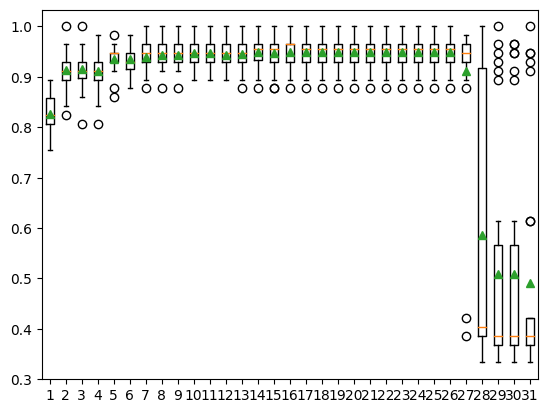

In [ ]:
#define the data set
X,y=load_dataset('updated_data.csv')
X = data.drop('diagnosis', axis=1)  # Assuming 'diagnosis' is the target column
y = data['diagnosis']
#define the no. of features
num_features=[i+1 for i in range(X.shape[1])]

#enumerate each no. of feature
results=list()
for k in num_features:
    #create pipeline
    model=LogisticRegression(solver='liblinear')
    fs=SelectKBest(score_func=f_classif,k=k)
    pipeline=Pipeline(steps=[('anova',fs),('lr',model)])

    #evaluate the model
    scores=evaluate_model(pipeline)
    results.append(scores)

    print('#%d %.3f (%.3f)' %(k,mean(scores),std(scores)))
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()